In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
gold_data = pd.read_csv("C:/Users/KIIT/GOLDPRICE.csv")

In [3]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
gold_data.shape

(2290, 6)

In [6]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [12]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [18]:
numeric_data = gold_data.select_dtypes(include=[np.number])

correlation = numeric_data.corr()

<Axes: >

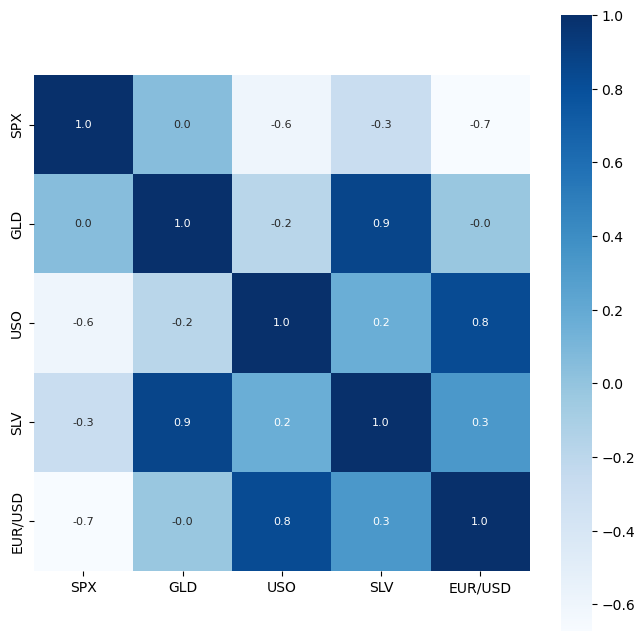

In [19]:
plt.figure(figsize=(8, 8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size' : 8}, cmap='Blues')

In [20]:
gold_data.drop(columns=["Date"], axis=1, inplace=True)

In [21]:
gold_data.head()


,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.180,1.471692
1,1447.160034,85.570000,78.370003,15.285,1.474491
2,1411.630005,85.129997,77.309998,15.167,1.475492
3,1416.180054,84.769997,75.500000,15.053,1.468299
4,1390.189941,86.779999,76.059998,15.590,1.557099


In [22]:
X = gold_data.drop(columns=['GLD'], axis=1)
y = gold_data['GLD']

In [23]:
X.head()


,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.180,1.471692
1,1447.160034,78.370003,15.285,1.474491
2,1411.630005,77.309998,15.167,1.475492
3,1416.180054,75.500000,15.053,1.468299
4,1390.189941,76.059998,15.590,1.557099


In [24]:
y.head()


0    84.860001
1    85.570000
2    85.129997
3    84.769997
4    86.779999
Name: GLD, dtype: float64

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [26]:
model = RandomForestRegressor(n_estimators=100)

In [29]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [32]:
from sklearn.metrics import r2_score

prediction_X_train = model.predict(X_train)
print(f"Accuracy on training data: {r2_score(y_train, prediction_X_train)}")

Accuracy on training data: 0.9984690258617586


In [33]:
prediction_X_test = model.predict(X_test)

print(f"Accuracy on testing data: {r2_score(y_test, prediction_X_test)}")

Accuracy on testing data: 0.9859011573526931


In [34]:
y_test = y_test.reset_index(drop=True)

for i in range(len(prediction_X_test)):
  print(f"Predicted Gold Price: ${prediction_X_test[i]}. Actual Gold Price: ${y_test[i]}")

Predicted Gold Price: $163.65339977000005. Actual Gold Price: $161.990005
Predicted Gold Price: $127.46279937999994. Actual Gold Price: $127.580002
Predicted Gold Price: $124.31069950000003. Actual Gold Price: $124.57
Predicted Gold Price: $119.50549900999998. Actual Gold Price: $118.970001
Predicted Gold Price: $126.04959941999984. Actual Gold Price: $125.720001
Predicted Gold Price: $85.80189786000004. Actual Gold Price: $85.129997
Predicted Gold Price: $171.83440122. Actual Gold Price: $171.470001
Predicted Gold Price: $136.48520009. Actual Gold Price: $155.330002
Predicted Gold Price: $106.75350070999995. Actual Gold Price: $108.089996
Predicted Gold Price: $132.66020171999995. Actual Gold Price: $130.589996
Predicted Gold Price: $120.76489936999992. Actual Gold Price: $119.82
Predicted Gold Price: $124.84620017999994. Actual Gold Price: $124.599998
Predicted Gold Price: $143.30439813000004. Actual Gold Price: $142.380005
Predicted Gold Price: $104.62450037000009. Actual Gold Price

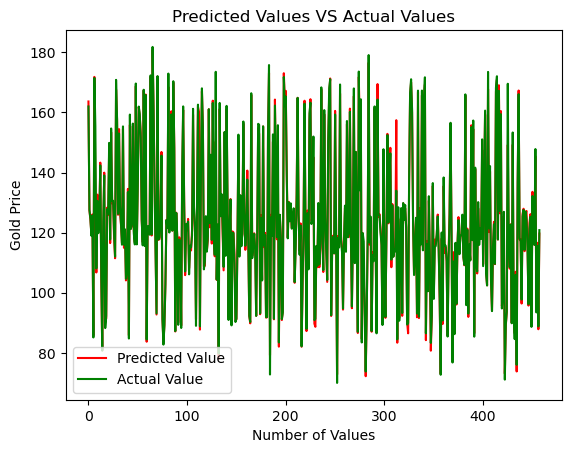

In [37]:
predicted_X_test_plot = list(prediction_X_test)
y_test_plot = list(y_test)

plt.plot(predicted_X_test_plot, color='red', label='Predicted Value')
plt.plot(y_test_plot, color='green', label='Actual Value')
plt.title('Predicted Values VS Actual Values')
plt.xlabel('Number of Values')
plt.ylabel('Gold Price')
plt.legend()

In [38]:
import pickle

with open('gold_price_pred_model.pkl', 'wb') as f:
    pickle.dump(model, f)